In [2]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
trainData = MNIST(
    root=".MNIST",
    download = True,
    train = True,
    transform =  ToTensor()
)

C:\Users\YGW\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
labels = trainData.targets
labels = labels.unsqueeze(1)
data = trainData.data
data[data<=0]=0
data[data>1]=1
data.shape,labels.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [5]:
data=data[:,...].flatten(start_dim=1)

In [17]:
finaldata = np.hstack([labels,data])

In [21]:
traindataChart  = pd.DataFrame(finaldata)
traindataChart

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


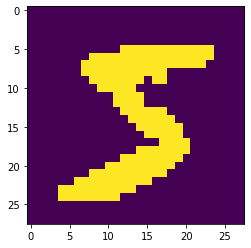

In [22]:
img = traindataChart.iloc[0,1:]
img= np.float32(img)*255
img = img.reshape(28,28)
plt.imshow(img)

In [25]:
testData = MNIST(
    root=".MNIST",
    download = True,
    train = False,
    transform =  ToTensor()
)
labels = testData.targets
labels = labels.unsqueeze(1)
data = testData.data
data[data<=0]=0
data[data>1]=1
data=data[:,...].flatten(start_dim=1)
finaldata = np.hstack([labels,data])
testdataChart  = pd.DataFrame(finaldata)
testdataChart.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
testdataChart.to_csv("testData.csv",index=False)
traindataChart.to_csv("trainData.csv",index=False)